# Classification Metrics and Visualization

This notebook demonstrates various classification metrics and their visualization techniques, focusing on:
- Confusion Matrix
- ROC Curve
- Classification Report
- Accuracy and F1 Score

## Theory Overview

### Confusion Matrix
A confusion matrix is a table that visualizes the performance of a classification model:
- True Positives (TP): Correctly predicted positive cases
- True Negatives (TN): Correctly predicted negative cases
- False Positives (FP): Incorrectly predicted positive cases (Type I error)
- False Negatives (FN): Incorrectly predicted negative cases (Type II error)

### ROC Curve
The Receiver Operating Characteristic (ROC) curve:
- Plots True Positive Rate vs False Positive Rate
- Area Under Curve (AUC) measures overall classification performance
- Perfect classifier: AUC = 1.0
- Random classifier: AUC = 0.5

### Other Metrics
- Accuracy: Overall correctness (TP + TN) / Total
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1 Score: Harmonic mean of precision and recall

## 1. Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, 
    roc_curve, 
    accuracy_score, 
    f1_score,
    classification_report,
    roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Set random seed for reproducibility
np.random.seed(42)

## 2. Generate Synthetic Dataset

We'll create a synthetic classification dataset with:
- 1000 samples
- 20 features
- 2 classes
- 5 informative features

In [2]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dataset shapes:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Class distribution in training set:")
print(np.bincount(y_train))

Dataset shapes:
Training set: (800, 20)
Testing set: (200, 20)
Class distribution in training set:
[404 396]


## 3. Train Random Forest Classifier

We'll use Random Forest as our classifier and get both class predictions and probability estimates.

In [3]:
# Create and train the model
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf_classifier.fit(X_train, y_train)

# Get predictions and probabilities
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

## 4. Confusion Matrix Visualization

Let's create a heatmap visualization of the confusion matrix with annotations.

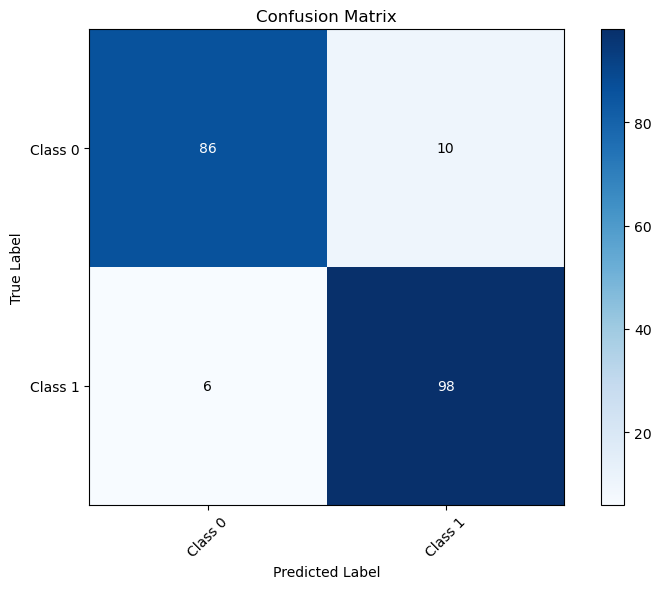

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        96
           1       0.91      0.94      0.92       104

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [4]:
def plot_confusion_matrix(y_true, y_pred, classes=['Class 0', 'Class 1']):
    """
    Plot confusion matrix as a heatmap with annotations
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    # Add labels
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred)

# Print classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

## 5. ROC Curve Visualization

The ROC curve shows the trade-off between:
- True Positive Rate (Sensitivity)
- False Positive Rate (1 - Specificity)

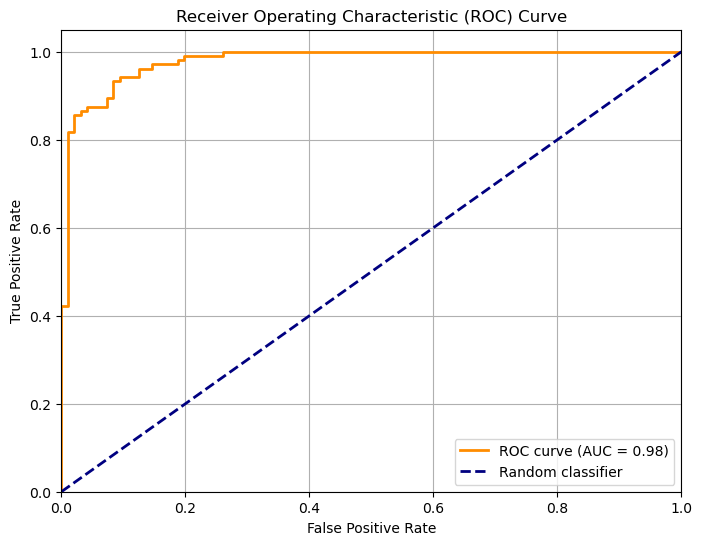

In [5]:
def plot_roc_curve(y_true, y_pred_proba):
    """
    Plot ROC curve with AUC score
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Random classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Plot ROC curve
plot_roc_curve(y_test, y_pred_proba)

## 6. Performance Analysis

Let's analyze the model's performance using various metrics and visualize the feature importances.

Model Performance Metrics:
Accuracy: 0.9200
F1 Score: 0.9245


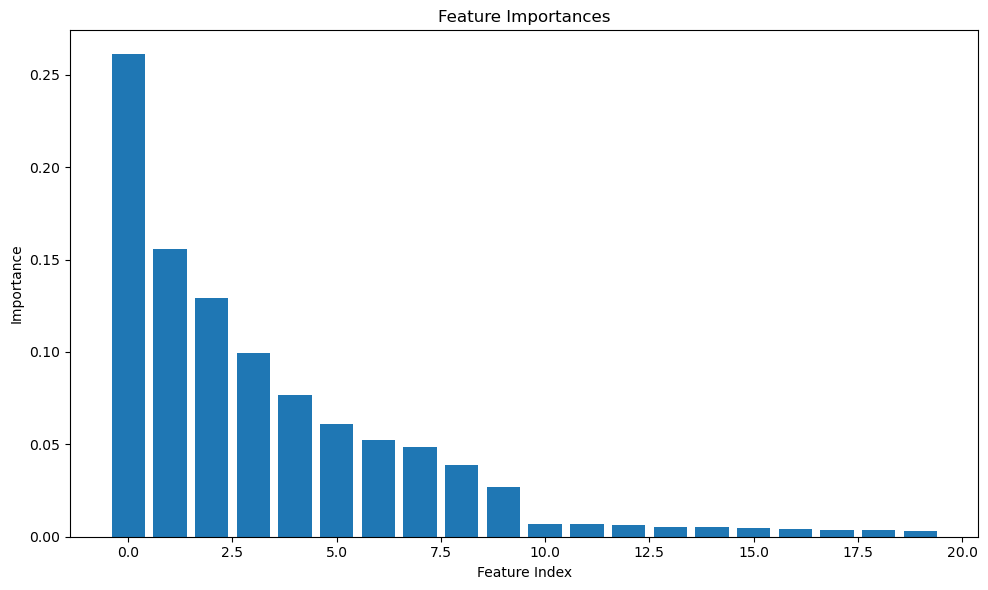

In [6]:
# Calculate and display metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot feature importances
feature_importance = rf_classifier.feature_importances_
feature_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importance[feature_indices])
plt.title('Feature Importances')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()